In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = datetime.now()

In [4]:
df = pd.read_csv(r'D:\SATYAM\Nattwest\dataset\cubic_zirconia.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Headers in the dataset

In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

#### Dataset basic information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


##### Dropping the first column as it is a duplicate index

In [8]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

697 rows of depth column have null values

## EDA

### Looking for duplicates

In [9]:
df.duplicated().sum()

34

A total of 34 rows in the dataset have duplicate values


##### Dropping duplicate values

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
print(df.shape)

(26933, 10)


##### Looking for null values

In [12]:
df.isnull().sum().sort_values(ascending = False)

depth      697
carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price        0
dtype: int64

depth column as the most and only null values

In [13]:
df.describe() #statistical information of

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


##### Replacing missing/null values with median

In [14]:
df['depth'].fillna(df['depth'].median(),inplace = True)

In [15]:
df.isnull().sum().sort_values(ascending = False)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
df.describe() 

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Univariate analysis

#### Outlier check for each numeric column attribute

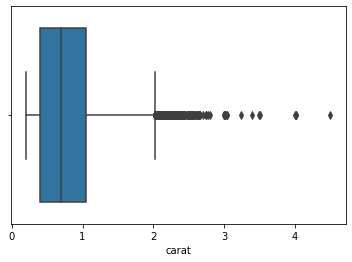

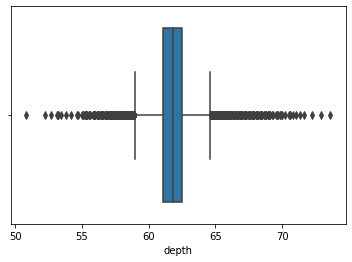

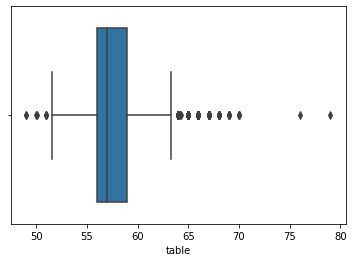

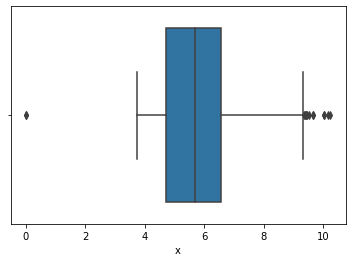

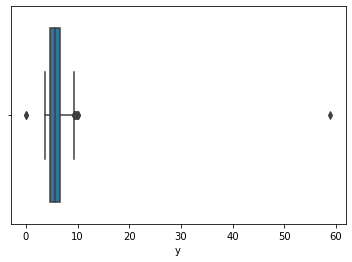

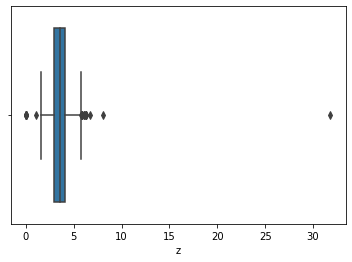

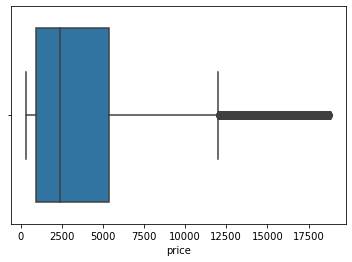

In [17]:
for i in ['carat','depth', 'table', 'x', 'y', 'z','price' ]:
    sns.boxplot(df[i])
    plt.show();

#### Getting rid of outliers from all the columns to reduce the lack of consistency of our data as some of the outliers have very high extreme values and could cause improper analysis. This will ensure proper statistical integrity of our data and will be much more significant to any further analysis.

In [18]:
columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [19]:
def outlier_removal(list_of_columns):
    
    sorted(list_of_columns)
    
    lower_quartile,upper_quartile = np.percentile(list_of_columns,[25,75])    # creates the lower and upper quartile range
    inter_quartile_range = np.subtract(upper_quartile,lower_quartile)
    
    minimum_limit = lower_quartile-(1.5 * inter_quartile_range)
    maximum_limit = upper_quartile+(1.5 * inter_quartile_range)
    
    return minimum_limit, maximum_limit

In [20]:
for i in df[columns]:
    lr,ur=outlier_removal(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

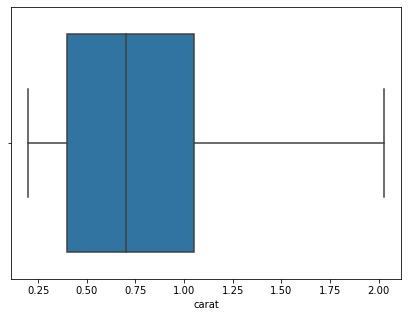

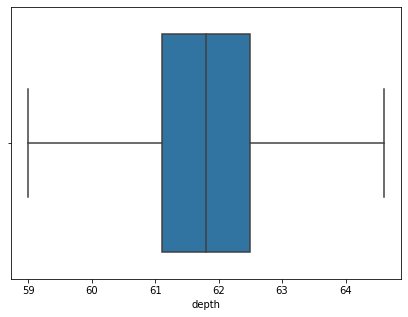

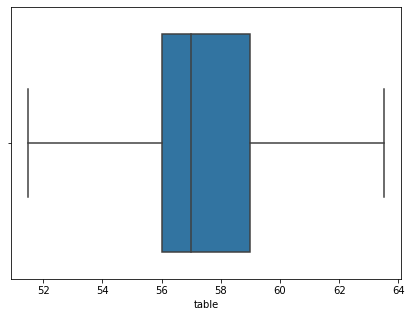

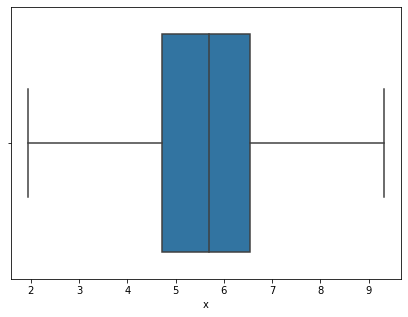

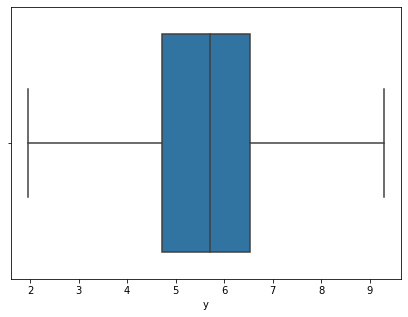

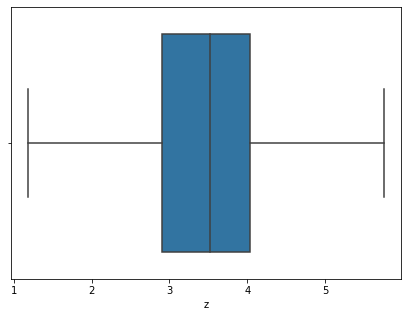

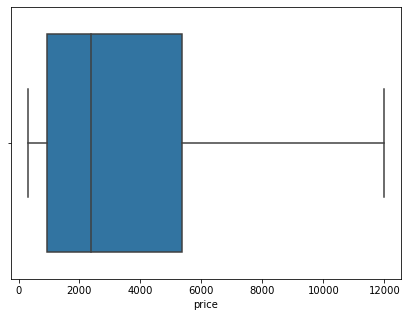

In [21]:
for i in ['carat','depth', 'table', 'x', 'y', 'z','price' ]:
    plt.figure(figsize=(7,5));
    sns.boxplot(df[i])
    plt.show();

As seen in the plots above we've managed to remove the outliers for the numeric column attributes

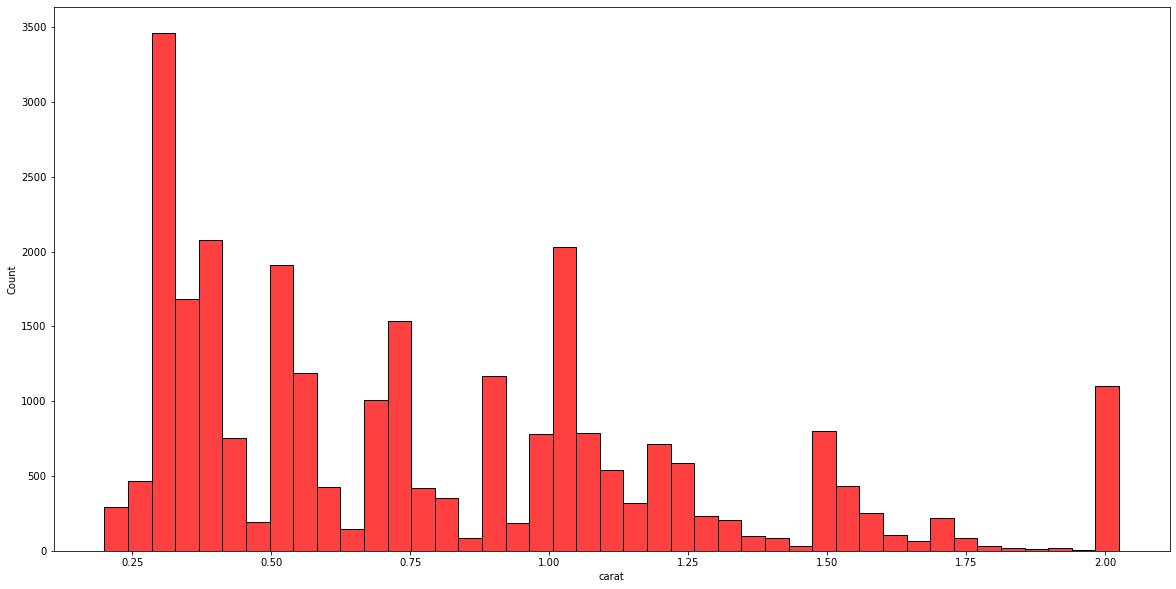

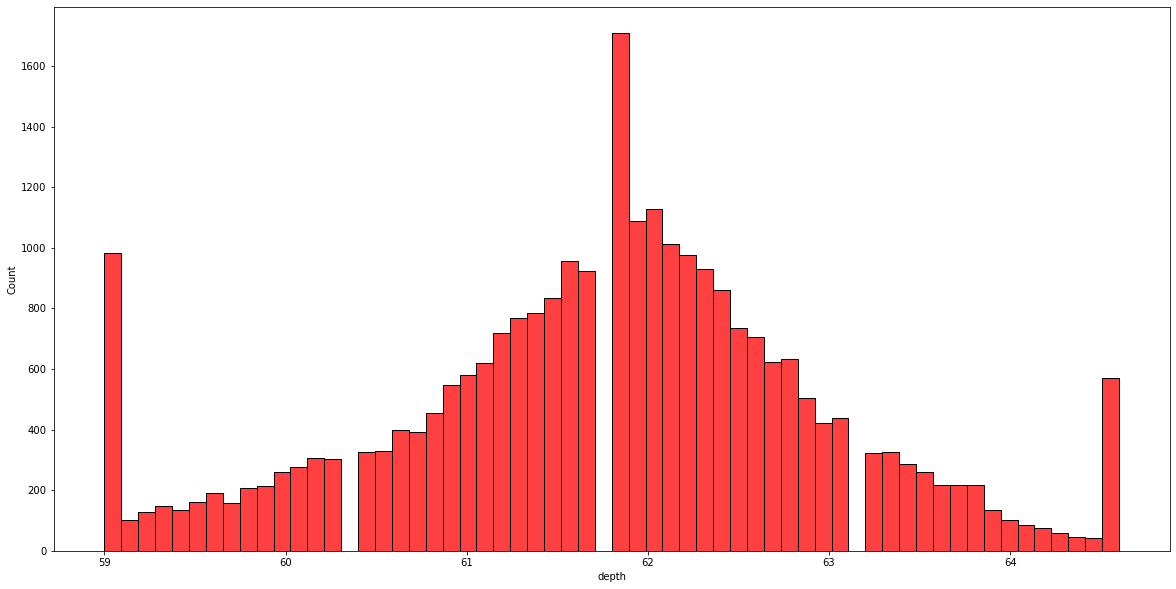

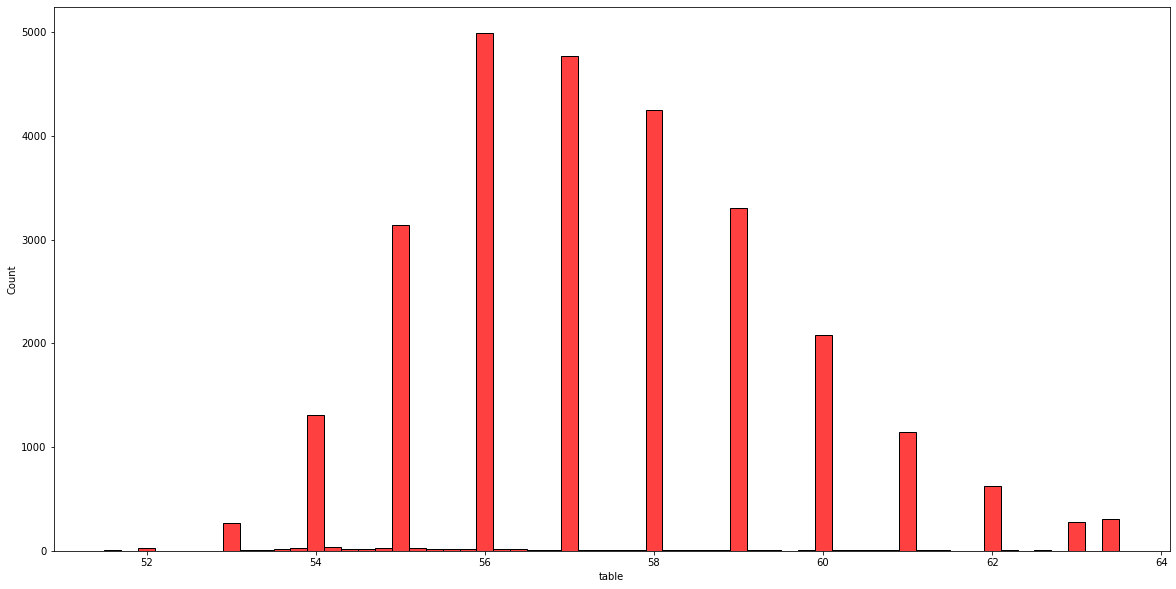

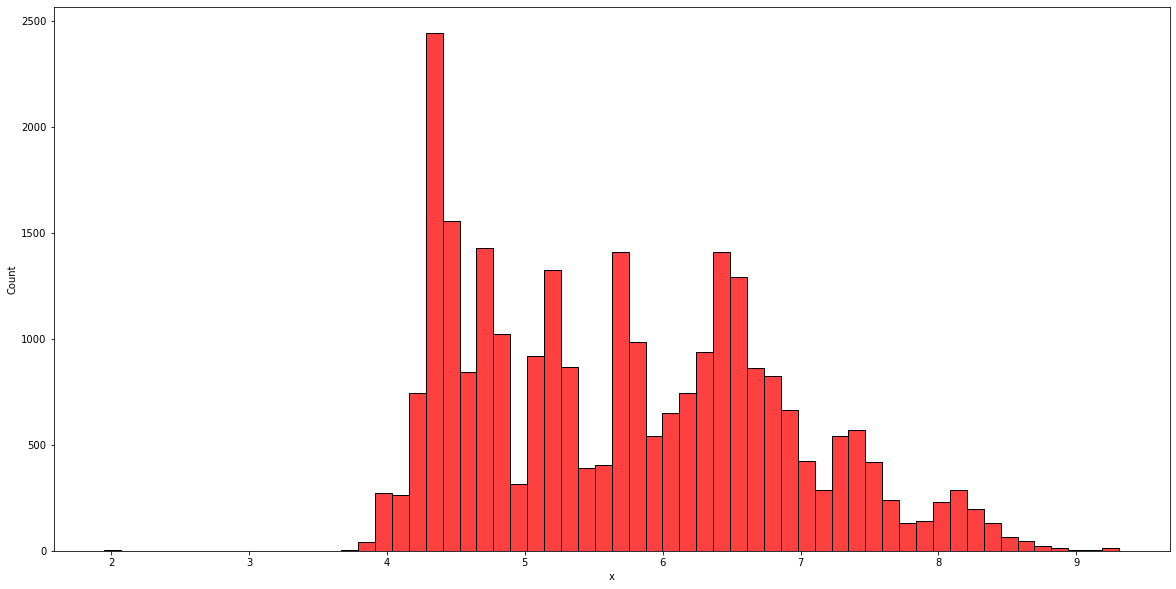

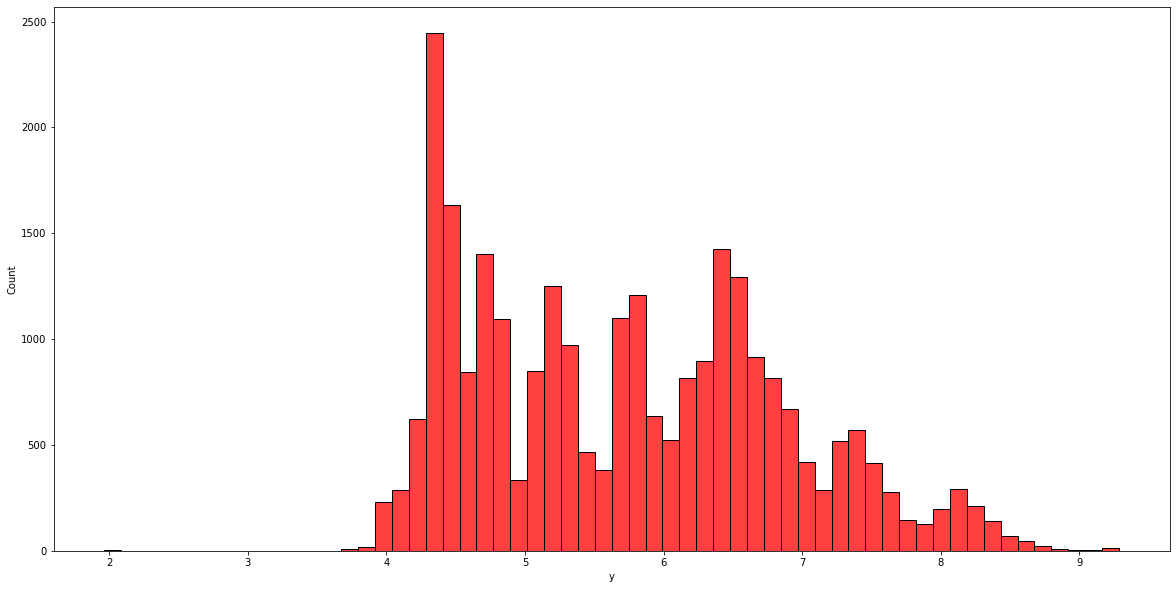

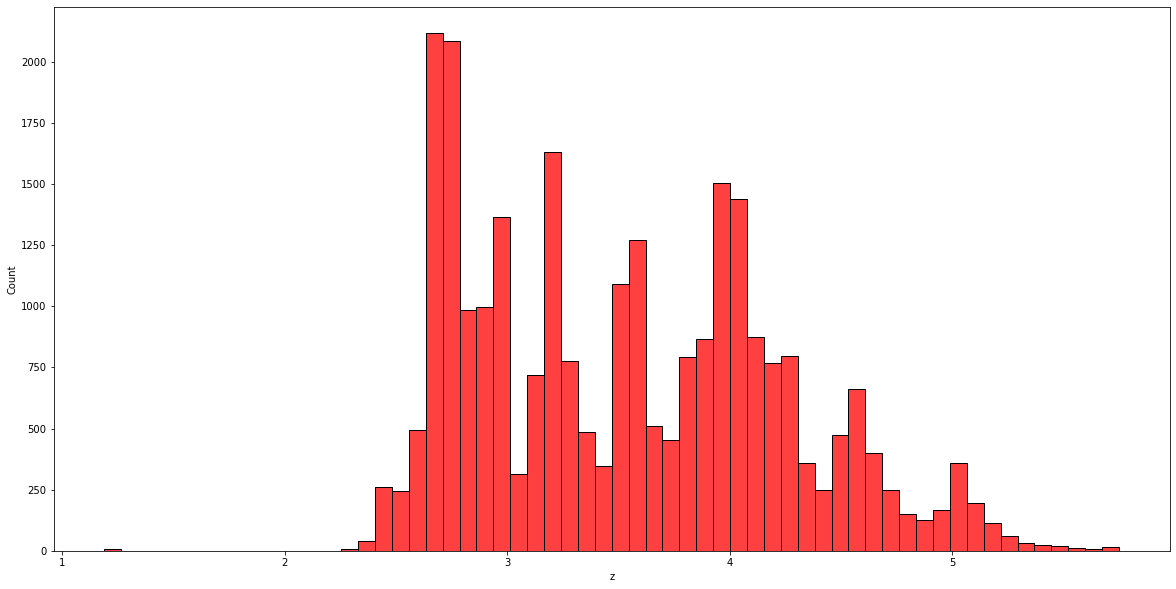

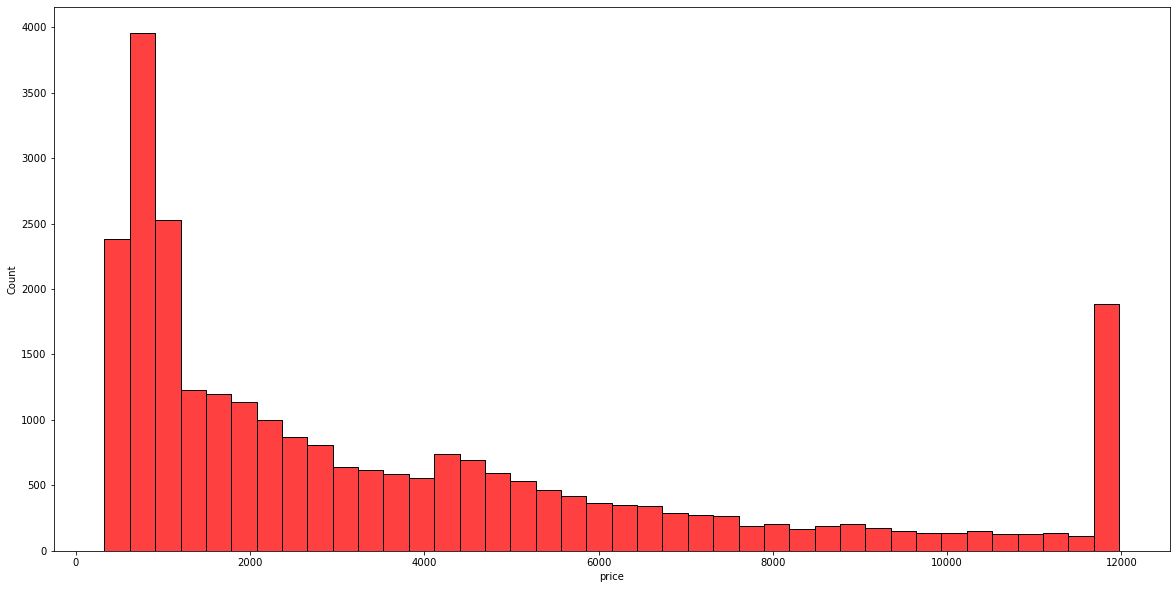

In [22]:
for i in ['carat','depth', 'table', 'x', 'y', 'z','price' ]:
    sns.color_palette("husl", 9)
    
    plt.figure(figsize=(20,10));
    sns.histplot(df[i], color = 'red')
    
    plt.show();

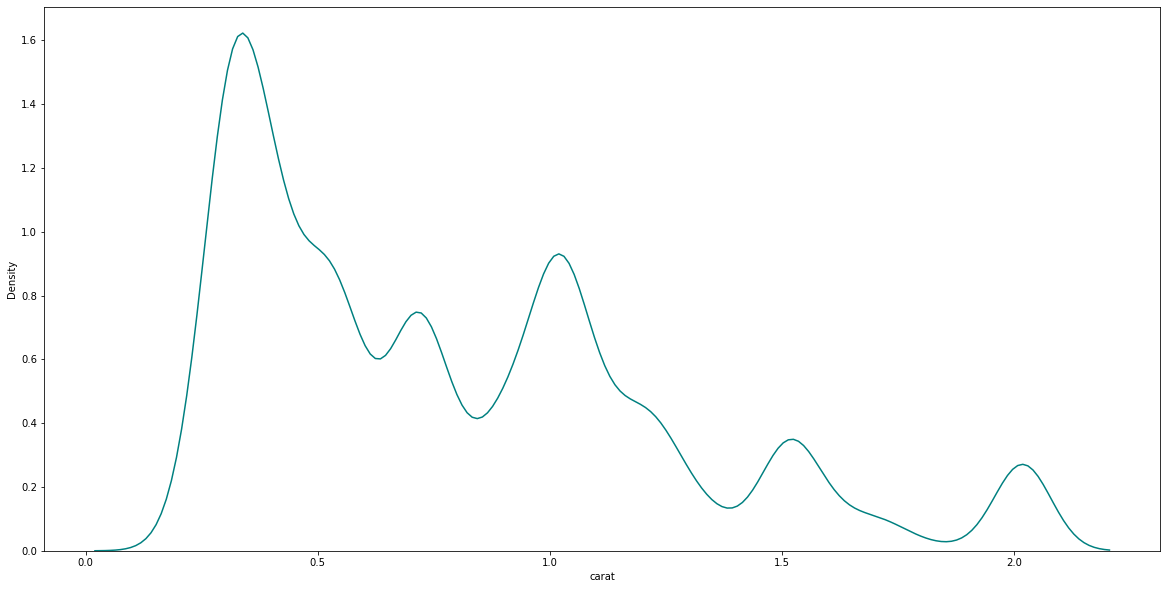

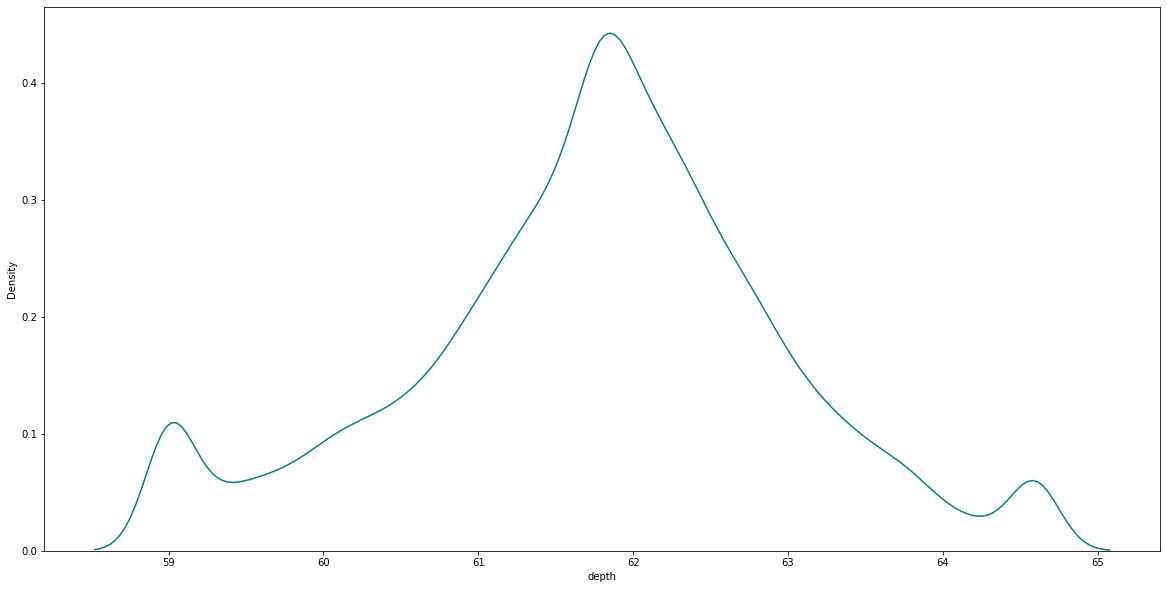

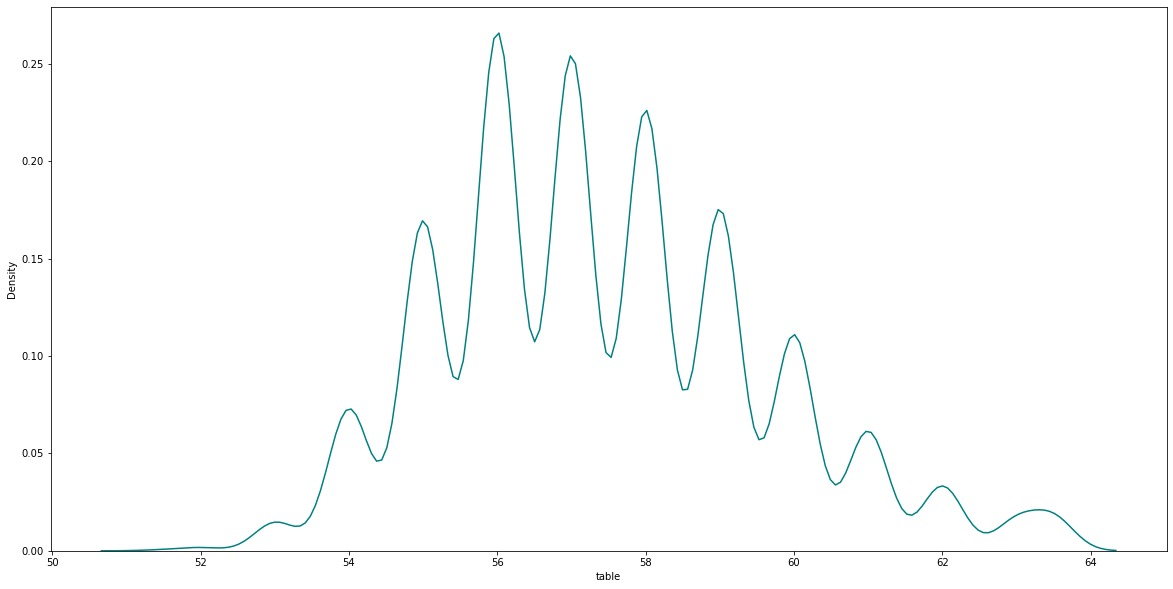

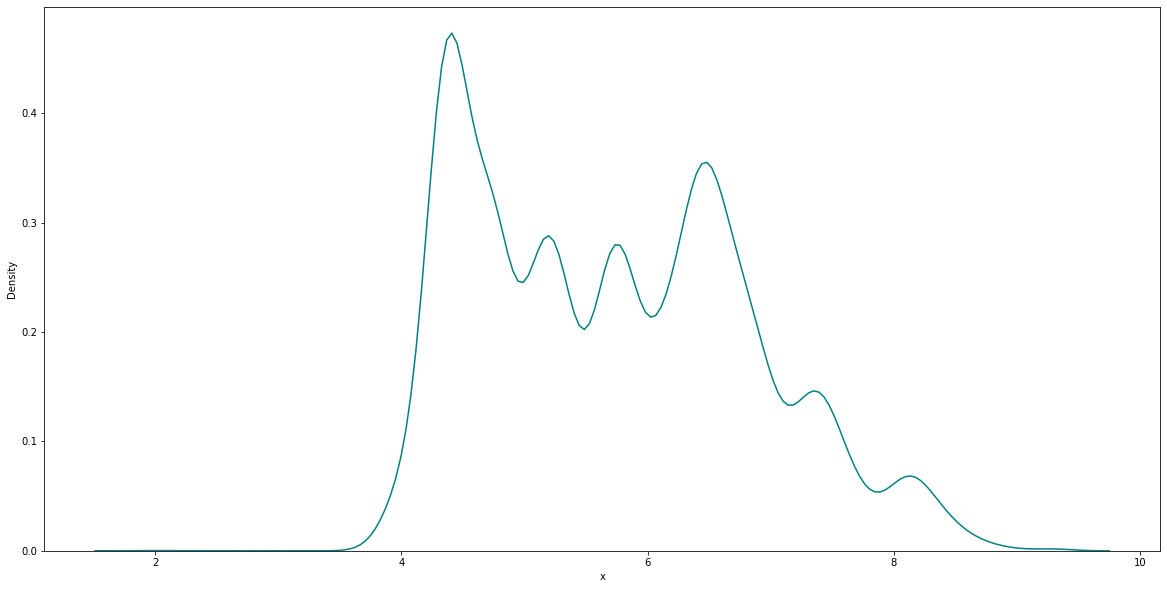

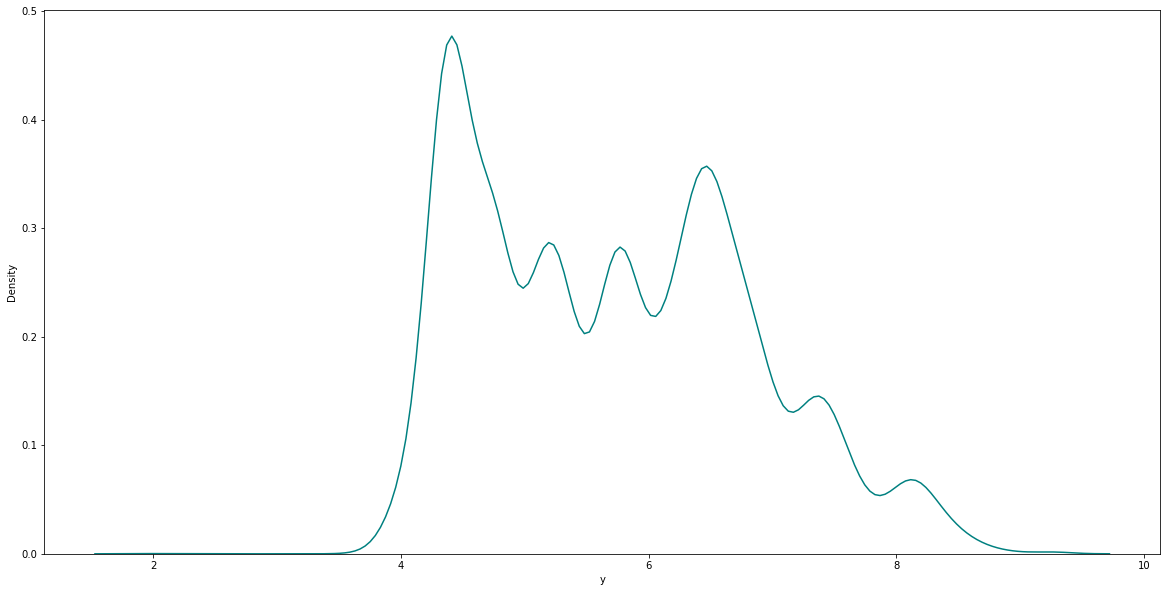

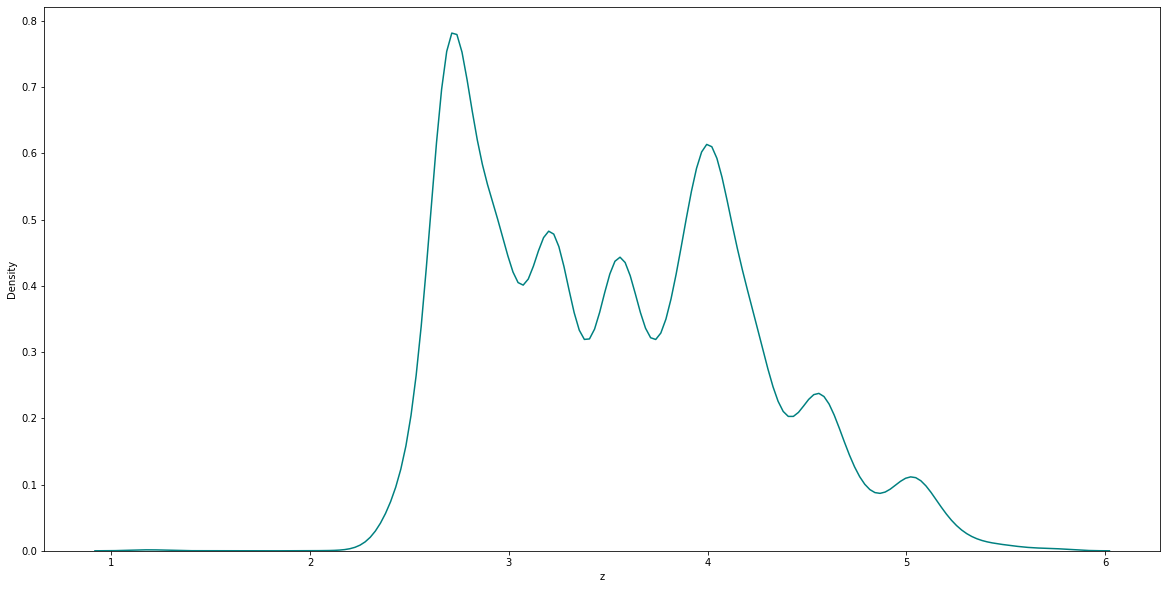

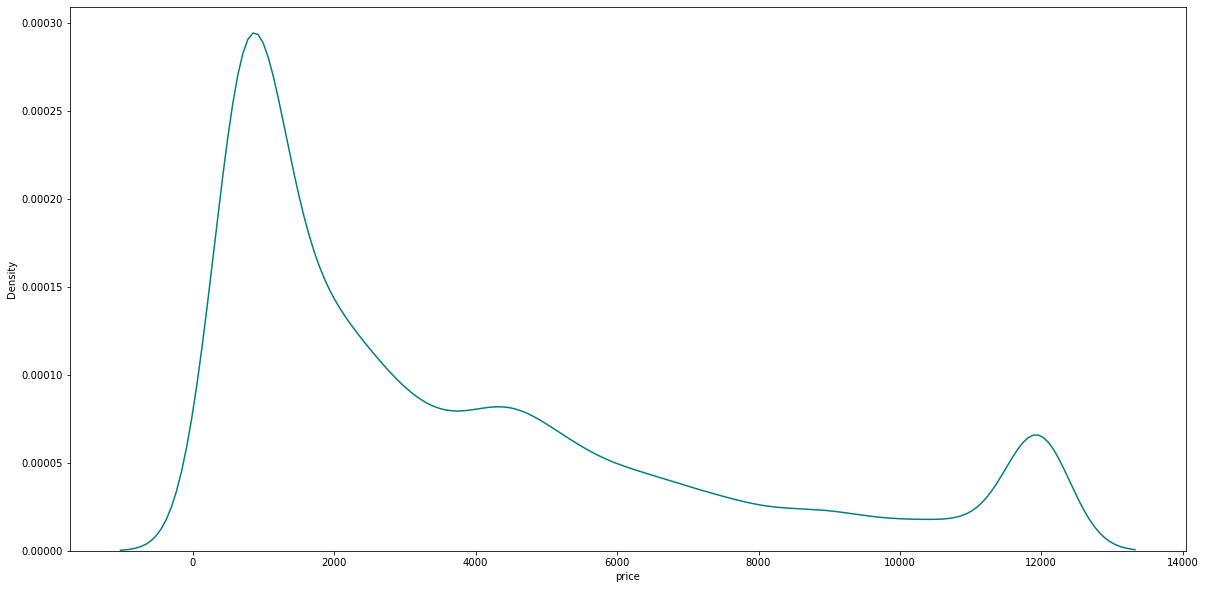

In [23]:
for i in ['carat','depth', 'table', 'x', 'y', 'z','price' ]:
    sns.color_palette("husl", 9)
    plt.figure(figsize=(20,10));
    sns.kdeplot(df[i], color = 'teal')
    
    plt.show();

##### Skewness of the column attributes

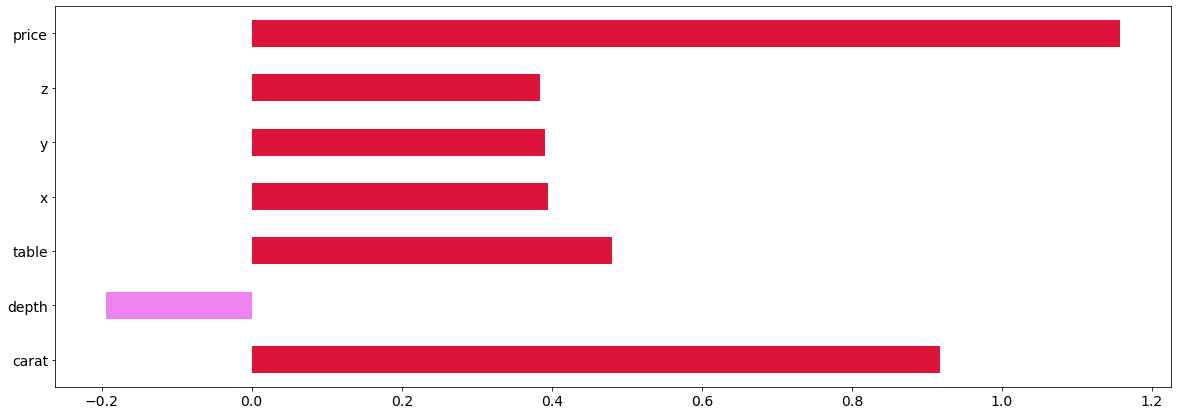

In [24]:
df4 = pd.Series(df.skew())
df4.plot(kind = 'barh', color=np.where(df4 < 0, 'violet', 'crimson'),figsize=(20,7),fontsize=14)
plt.show();

From the above plot we can se that apart from 'depth' every other column attribute is positively skewed, ie, their median lies closer to their maximum value.

### Multivariate analysis

#### Plotting correlation among the attributes

In [25]:
df2 = df[['carat','depth', 'table', 'x', 'y', 'z','price' ]]

In [26]:
df2.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029433,0.187143,0.982387,0.981464,0.977508,0.936762
depth,0.029433,1.000000,-0.289357,-0.019848,-0.022884,0.095253,-0.001060
table,0.187143,-0.289357,1.000000,0.199061,0.193428,0.159380,0.137880
x,0.982387,-0.019848,0.199061,1.000000,0.998491,0.988168,0.912933
y,0.981464,-0.022884,0.193428,0.998491,1.000000,0.987841,0.914361
z,0.977508,0.095253,0.159380,0.988168,0.987841,1.000000,0.905866
price,0.936762,-0.001060,0.137880,0.912933,0.914361,0.905866,1.000000


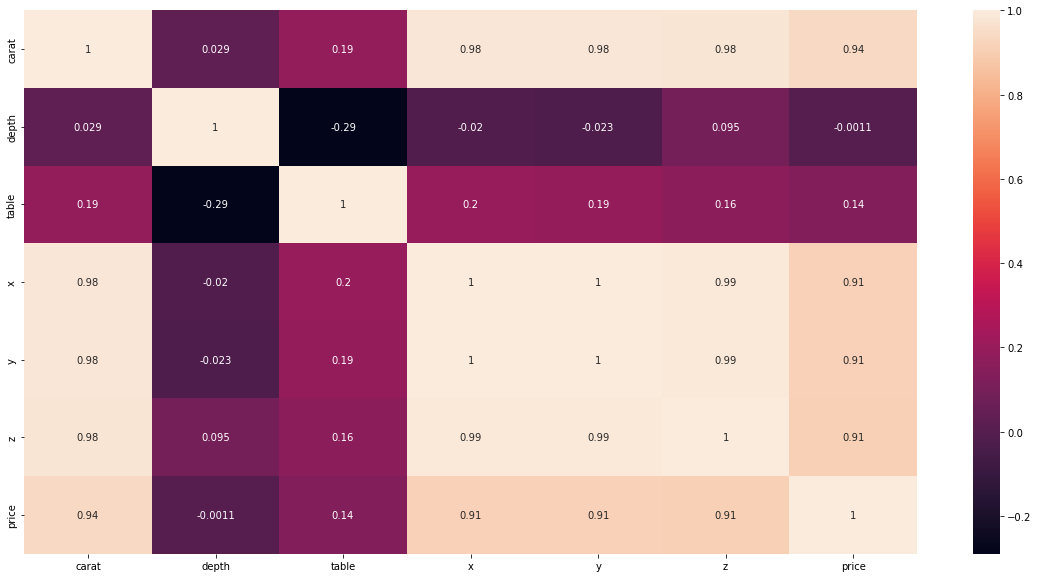

In [27]:
plt.figure(figsize=(20,10));
sns.heatmap(df2.corr(),annot=True)
plt.show();

<Figure size 2160x1440 with 0 Axes>

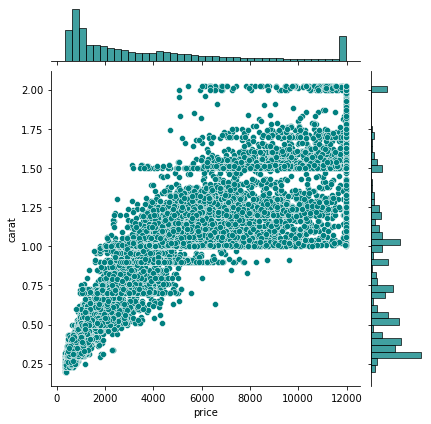

In [28]:
plt.figure(figsize=(30,20));

sns.jointplot(x = 'price', y ='carat', data = df2,color = 'teal')
plt.show();

It can be inferred from the above plot that the price of diamonds increases with carats with a visible lower gradient of increase as the carat reaches above 1.00

<Figure size 1440x1440 with 0 Axes>

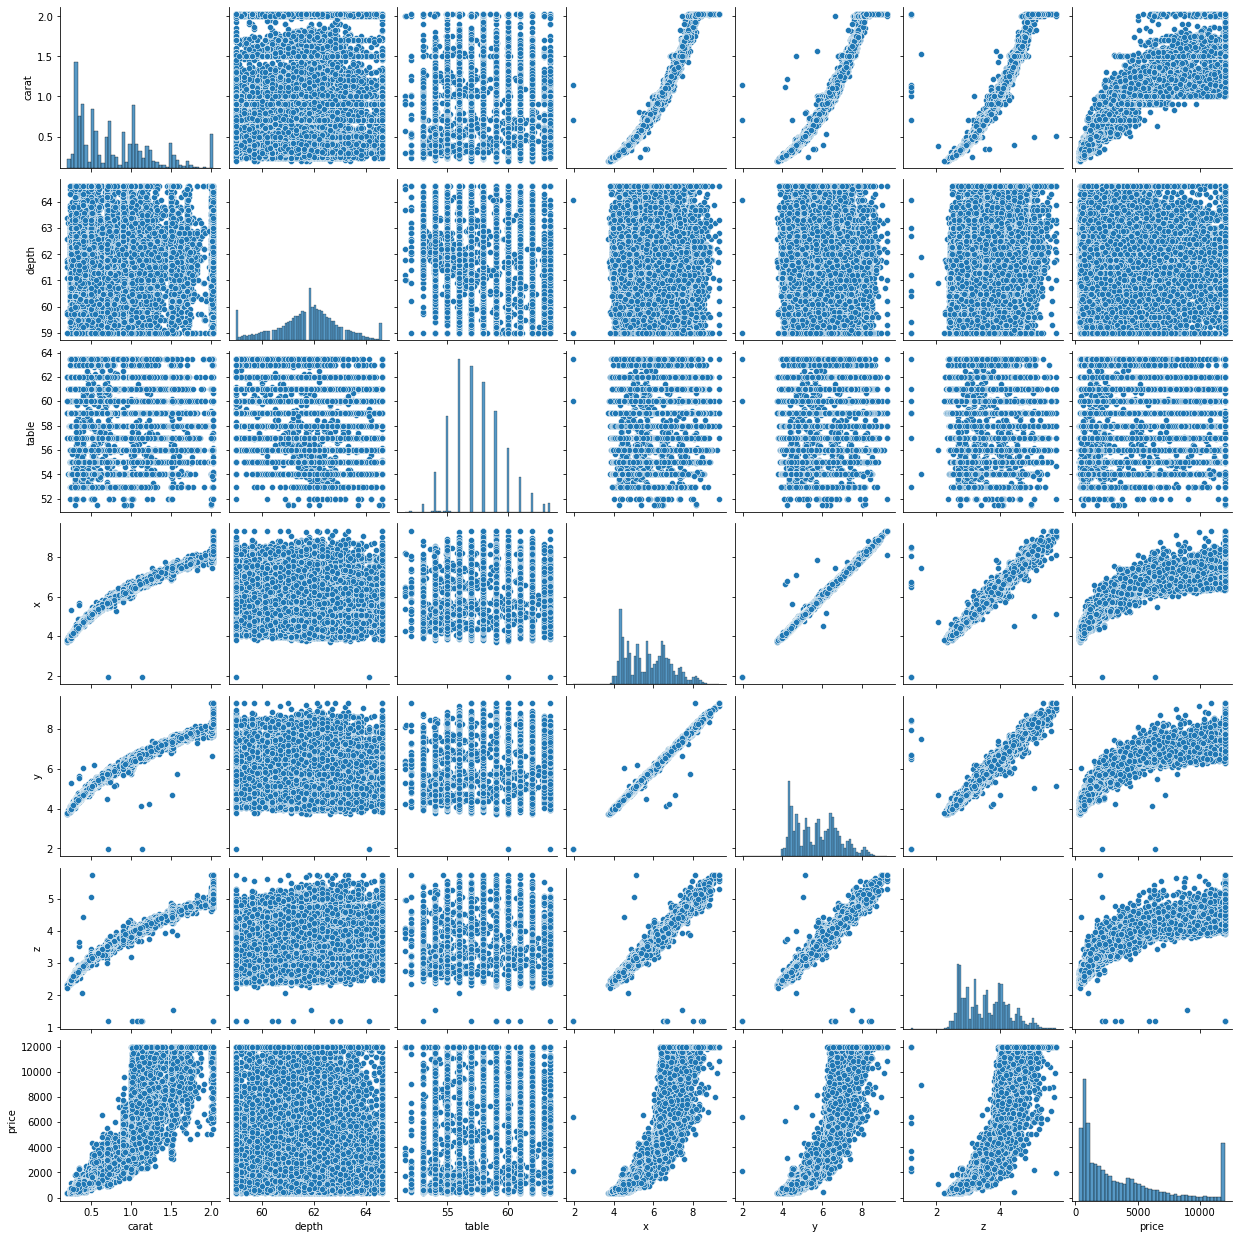

In [29]:
plt.figure(figsize=(20,20));

sns.pairplot(df2, diag_kind="hist")

plt.show();

##### Variation of price with calarity, cut and color of the diamonds

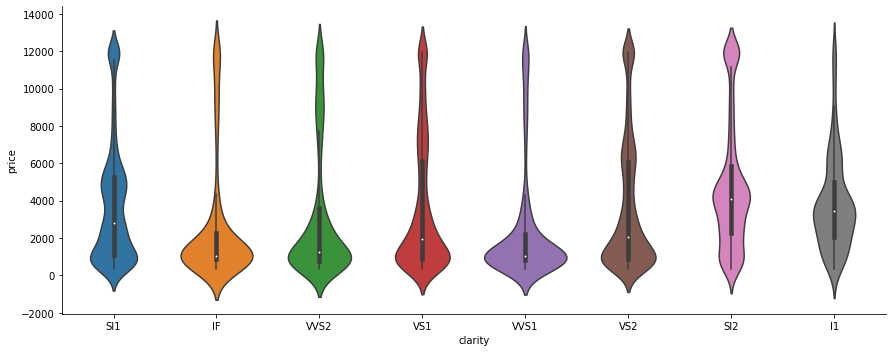

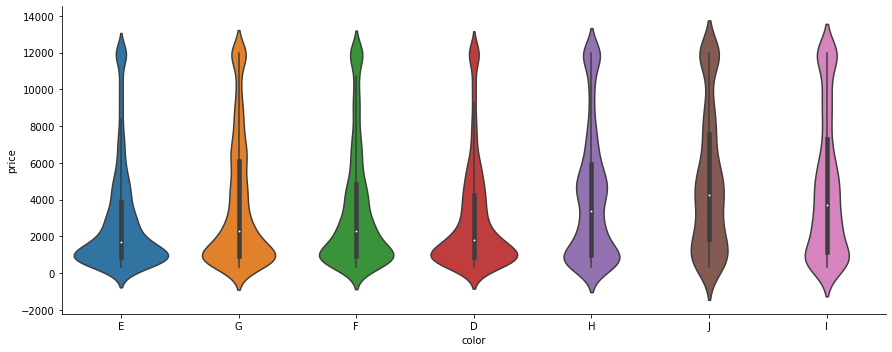

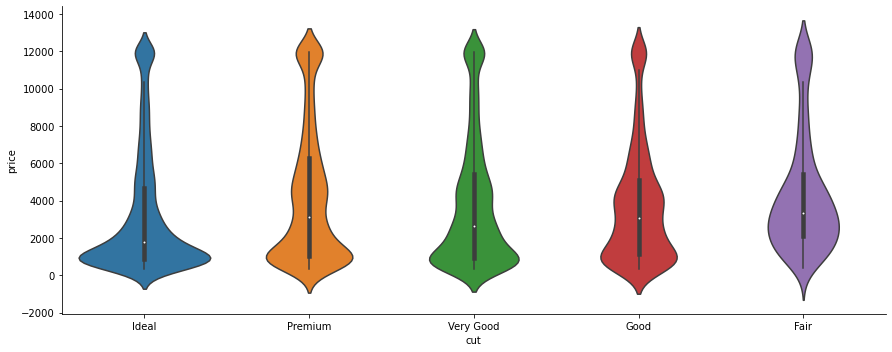

In [30]:
print(sns.catplot(x='clarity', y='price', kind='violin', data=df, aspect=2.5))
print(sns.catplot(x='color', y='price', kind='violin', data=df, aspect=2.5))
print(sns.catplot(x='cut', y='price', kind='violin', data=df, aspect=2.5))

plt.show();

In [31]:
end = datetime.now()
end - start

datetime.timedelta(seconds=16, microseconds=340513)